In [1]:
import numpy as np
import time
import healpy as hp
import matplotlib.pyplot as plt

import lenspyx
from lenspyx.lensing import get_geom

import shtns
import pysht

lmax, mmax = 1024, 1024
geominfo = ('gl',{'lmax': lmax})
tlib = get_geom(geominfo)

: 

In [2]:
"""
synthesis
"""

lmax, mmax = 1024, 1024
print(hp.Alm.getsize(lmax))
geominfo = ('gl',{'lmax': lmax})
tlib = get_geom(geominfo)
lalm = np.array(np.random.random(size=hp.Alm.getsize(lmax)), dtype=complex)

backend = 'CPU'
if backend == 'CPU':
    tlib.set_backend(backend)
    # Fix weighting
    s_cpu = tlib.synthesis(lalm.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("s_cpu.shape: {}".format(s_cpu.shape))

backend = 'GPU'
if backend == 'GPU':
    tlib.set_backend(backend)
    sh = tlib.get_transformer(lmax, mmax)
    # lalm = sh.spec_array()
    print("lalm {}, spec_array {}".format(lalm.shape, sh.spec_array().shape))
    s_gpu = tlib.synthesis(lalm.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("s_gpu.shape: {}".format(s_gpu.shape))

525825
s_cpu.shape: (1, 2109450)
lalm (525825,), spec_array (525825,)
GPU backend
s_gpu.shape: (2058, 1032)


In [3]:
(2058 * 1032 - 2109450)/2058

7.0

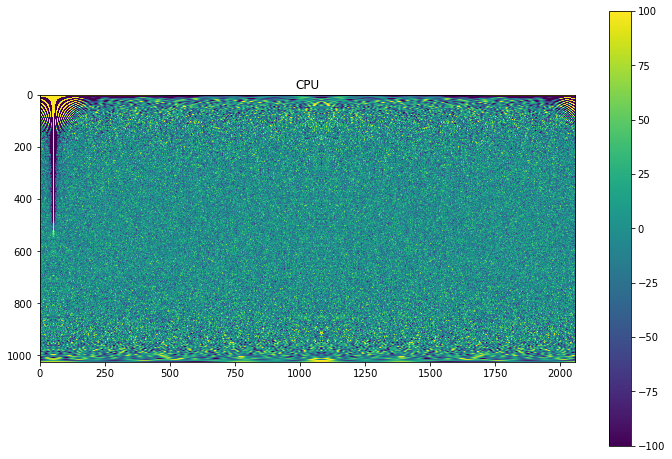

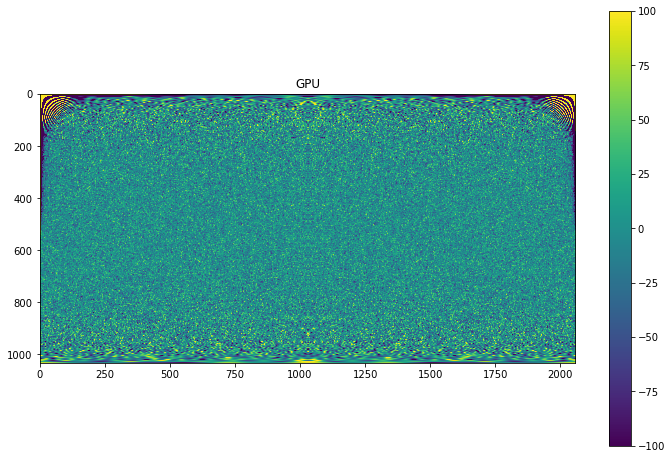

<Figure size 864x576 with 0 Axes>

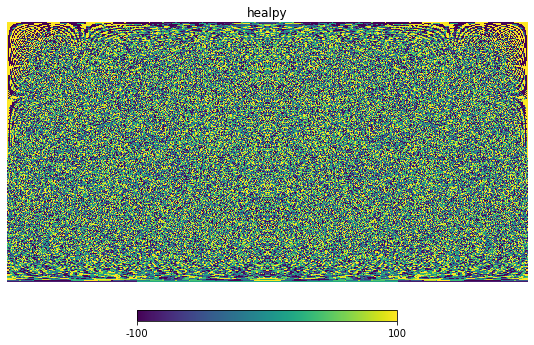

In [4]:
"""
DUCC CPU agrees with SHTns gpu, but they have different grids
"""

plt.figure(figsize=(12,8))
plt.imshow(np.roll(s_cpu.reshape(1025,-1),1080, axis=1), vmin=-100, vmax=100)
plt.colorbar()
plt.title('CPU')
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(np.roll(s_gpu.T,1029, axis=1), vmin=-100, vmax=100)
plt.colorbar()
plt.title('GPU')
plt.show()


plt.figure(figsize=(12,8))
hp.cartview(hp.alm2map(lalm, nside=512), cbar=True, min=-100, max=100)
plt.title('healpy')
plt.show()

## Adjoint synthesis

In [5]:
"""
adjoint_synthesis. I am using the maps generated from the alm2map in the previous cells so that spectra should be identical
"""

# lmax__ = 1031
# geom__ = get_geom(('gl',{'lmax': lmax__}))
# geom__.weight.shape


lmax, mmax = 1024, 1024
geominfo = ('gl',{'lmax': lmax})
tlib = get_geom(geominfo)
 # np.array(np.random.random(size=tlib.npix()))

backend = 'CPU'
if backend == 'CPU':
    tlib.set_backend(backend)
    # Fix weighting
    lmap = s_cpu
    print(lmap)
    adj_cpu = tlib.adjoint_synthesis(lmap.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("adj_cpu.shape: {}".format(adj_cpu.shape))
    print(adj_cpu)

backend = 'GPU'
if backend == 'GPU':
    tlib.set_backend(backend)
    sh = tlib.get_transformer(lmax, mmax)
    # lalm = sh.spec_array()
    # lmap_shape = s_gpu # sh.spat_array().shape
    # print("lmap spat_array {}".format(sh.spat_array().shape))
    # lmap_random = np.random.random(size=lmap_shape)
    lmap = s_gpu
    print(lmap)
    adj_gpu = tlib.adjoint_synthesis(lmap.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("adj_gpu.shape: {}".format(adj_gpu.shape))
    print(adj_gpu)

[[-595.20597489 -595.20383337 -595.19740876 ...   53.02861269
    53.0272418    53.02641909]]
adj_cpu.shape: (1, 525825)
[[   1.9981991 +0.00000000e+00j 1296.15949252+0.00000000e+00j
  1144.05880062+0.00000000e+00j ... 1808.6394587 +2.00008927e-13j
   715.51425365+8.02954610e-14j 1915.40032676-3.34844063e-14j]]
[[-578.20054138 -394.88117974  -68.11156148 ...  210.74114864
    56.58784866   53.06268129]
 [-578.19834527 -394.88057935  -68.11174737 ...  210.72046858
    56.58415322   53.06294181]
 [-578.19175688 -394.87877837  -68.11230393 ...  210.65843555
    56.57306853   53.06372327]
 ...
 [-578.1807761  -394.87577735  -68.11322786 ...  210.55507106
    56.55459953   53.06502544]
 [-578.19175688 -394.87877837  -68.11230393 ...  210.65843555
    56.57306853   53.06372327]
 [-578.19834527 -394.88057935  -68.11174737 ...  210.72046858
    56.58415322   53.06294181]]
adj_gpu.shape: (1, 525825)
[[4.30477008e-08+0.00000000e+00j 2.79234868e-05+0.00000000e+00j
  2.46467437e-05+0.00000000e+00j

In [6]:
# """
# adjoint_synthesis. I am using the maps generated from the alm2map in the previous cells so that spectra should be identical
# """

# # lmax__ = 1031
# # geom__ = get_geom(('gl',{'lmax': lmax__}))
# # geom__.weight.shape


# lmax, mmax = 1024, 1024
# geominfo = ('gl',{'lmax': lmax})
# tlib = get_geom(geominfo)
#  # np.array(np.random.random(size=tlib.npix()))

# backend = 'CPU'
# if backend == 'CPU':
#     tlib.set_backend(backend)
#     # Fix weighting
#     lmap = s_cpu
#     print(lmap)
#     adj_cpu = pysht.adjoint_synthesis(lmap.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
#     print("adj_cpu.shape: {}".format(adj_cpu.shape))
#     print(adj_cpu)

# backend = 'GPU'
# if backend == 'GPU':
#     tlib.set_backend(backend)
#     sh = tlib.get_transformer(lmax, mmax)
#     # lalm = sh.spec_array()
#     # lmap_shape = s_gpu # sh.spat_array().shape
#     # print("lmap spat_array {}".format(sh.spat_array().shape))
#     # lmap_random = np.random.random(size=lmap_shape)
#     lmap = s_gpu
#     print(lmap)
#     adj_gpu = tlib.adjoint_synthesis(lmap.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
#     print("adj_gpu.shape: {}".format(adj_gpu.shape))
#     print(adj_gpu)

In [10]:
factor = np.mean(hp.alm2cl(adj_cpu[0])/hp.alm2cl(adj_gpu[0]))
factor

2154654274897289.0

In [14]:
tlib.weight

array([4.43360066e-05, 1.03205380e-04, 1.62160955e-04, ...,
       1.62160955e-04, 1.03205380e-04, 4.43360066e-05])

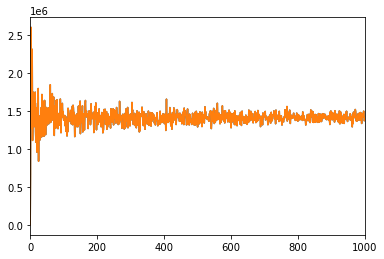

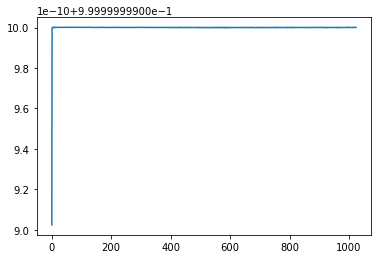

In [13]:
# adj_cpu.shape
plt.plot(hp.alm2cl(adj_cpu[0]))
plt.plot(hp.alm2cl(adj_gpu[0])*factor)
plt.xlim(0,1000)
# plt.loglog()
plt.show()

plt.plot(hp.alm2cl(adj_cpu[0])/(hp.alm2cl(adj_gpu[0])*factor))

plt.plot()
plt.show()
# plt.loglog()

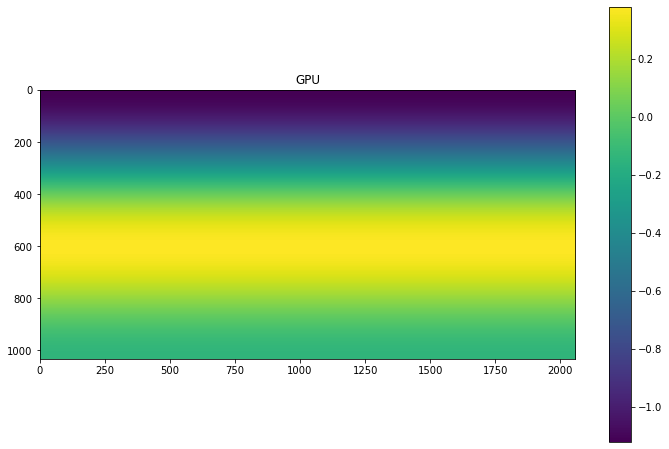

In [4]:
plt.figure(figsize=(12,8))
plt.imshow(synth_gpu_out.T-synth_gpu_1f.T)
plt.colorbar()
plt.title('GPU difference')
plt.show()

In [24]:
set((0.49*1e8*synth_gpu_out.T/synth_gpu_1f.T)[0,:])

{1.005770519310294, 1.0057705193102942, 1.0057705193102944, 1.0057705193102946}

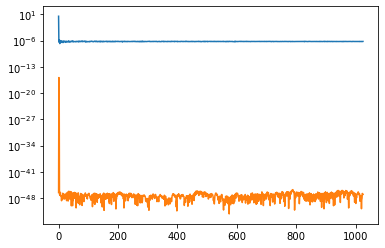

In [25]:
plt.plot(hp.alm2cl(adj_cpu[0]))
plt.plot(hp.alm2cl(adj_gpu[0]))
plt.yscale('log')

In [26]:
%timeit tlib.adjoint_synthesis(lmap, lmax=lmax, mmax=lmax, spin=0, nthreads=4)

13.4 ms ± 57 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%timeit tlib.adjoint_synthesis(m=lmap, lmax=lmax, mmax=lmax, spin=0, nthreads=4)

13.7 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
sh = shtns.sht(lmax, lmax)
sh.set_grid()
print(sh.spat_array().shape, np.dot(*sh.spat_array().shape))


(1032, 2058) 2123856


[]

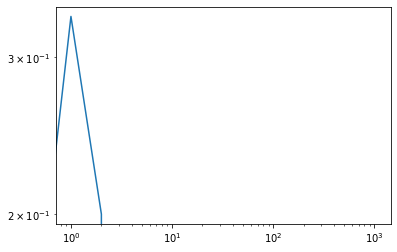

In [30]:
plt.plot(hp.alm2cl(lalm))
plt.loglog()